# Mathematical Underpinnings - Lab 2

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(aX - (X + \epsilon))^2 = \mathbb{E}(X(a - 1) + \epsilon)^2  = \mathbb{E}(X^2(a - 1)^2 + 2X(a - 1)\epsilon + \epsilon^2) = (a-1)^2\mathbb{E}(X^2) + 2(a-1)\mathbb{E}(X)\mathbb{E}(\epsilon) + \mathbb{E}(\epsilon^2) = (a-1)^2 + \sigma^2$,





In [ ]:
# (a - 1)^2 + sigma^2

In [14]:
def population_risk(a, sigma_eps):
    return (a - 1)**2 + sigma_eps**2

### b)

In [72]:
# sampling
n = 50
sigma_pow_2 = 1
X = np.random.normal(scale=1, size=n)
epsilon = np.random.normal(scale=sigma_pow_2, size=n)
a0 = 1
Y = a0* X + epsilon

In [73]:
X[:3]

array([-0.84892366, -0.37430672,  0.86263347])

In [74]:
Y[:3]

array([-0.46810467,  0.7406104 ,  1.76790104])

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [75]:
def empirical_risk(a, x, y):
    y_hat = a * x 
    diff = y - y_hat
    diff_pow_2 = np.power(diff, 2)
    return np.mean(diff_pow_2) 

In [76]:
empirical_risk(a=1, x=X, y=Y)

1.0529335592436733

### c)

In [77]:
a_range = np.linspace(-1, 3, num=300)
# sigma_range = np.linspace(0, 3, num=300)
sigma = 1. 

population_risks = np.array([population_risk(a, sigma) for a in a_range])
empirical_risks = np.array([empirical_risk(a, X, Y) for a in a_range])

In [78]:
import functools

# population_risk_with_sigma_1 = functools.partial(population_risks, sigma_eps=1) 
def to_optimize(a):
    return population_risk(a, sigma_eps=1)

emp_min = scipy.optimize.minimize(to_optimize, x0=1)
min_a_pop = emp_min["x"]
min_risk_pop = emp_min["fun"]

In [79]:
def to_optimize(a):
    return empirical_risk(a, x=X, y=Y)
emp_min = scipy.optimize.minimize(to_optimize, x0=1)
min_a_emp = emp_min["x"]
min_risk_emp = emp_min["fun"]

In [80]:
#emp value on pupulation
emp_val_on_pop = population_risk(min_a_emp, sigma_eps=1)

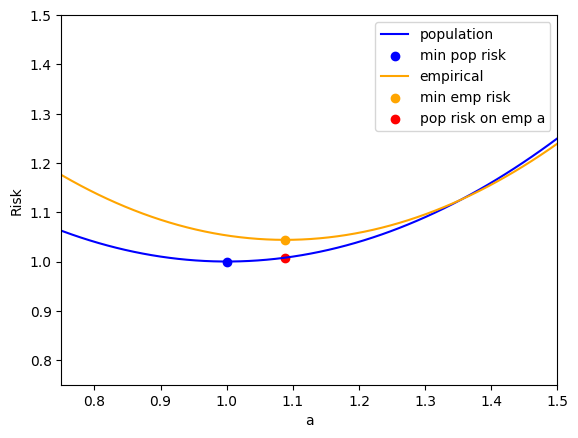

In [84]:
plt.plot(a_range, population_risks, c="blue", label="population")
plt.scatter(min_a_pop, min_risk_pop, c="blue", label="min pop risk")
plt.plot(a_range, empirical_risks, c="orange", label="empirical")
plt.scatter(min_a_emp, min_risk_emp, c="orange", label="min emp risk")
plt.scatter(min_a_emp, emp_val_on_pop, c="red", label="pop risk on emp a")
plt.xlim([0.75, 1.5])
plt.ylim([0.75, 1.5])
plt.xlabel("a")
plt.ylabel("Risk")
plt.legend()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [85]:
# excess risk
excess_risk = emp_val_on_pop - min_risk_pop
excess_risk[0]

0.0077753991726992044

In [90]:
# simulations with fixed sample size
L = 200
n = 50
samples_size_to_excess_risk = {}
for n in range(20, 500, 10):
    excess_risk_list = []
    for l in range(L):
        sigma_pow_2 = 1
        X = np.random.normal(scale=1, size=n)
        epsilon = np.random.normal(scale=sigma_pow_2, size=n)
        a0 = 1
        Y = a0* X + epsilon
        def to_optimize(a):
            return empirical_risk(a, x=X, y=Y)
        emp_min = scipy.optimize.minimize(to_optimize, x0=1)
        min_a_emp = emp_min["x"]
        min_risk_emp = emp_min["fun"]
        emp_val_on_pop = population_risk(min_a_emp, sigma_eps=1)
        excess_risk = emp_val_on_pop - min_risk_pop
        excess_risk_list.append(excess_risk[0])
    samples_size_to_excess_risk[n] = np.mean(excess_risk_list)

print("Mean excess risk for sample size 50 and 200 repeats")  
print(samples_size_to_excess_risk[50])

Mean excess risk for sample size 50 and 200 repeats
0.024070492821122887


In [91]:
# simulations for various sample sizes

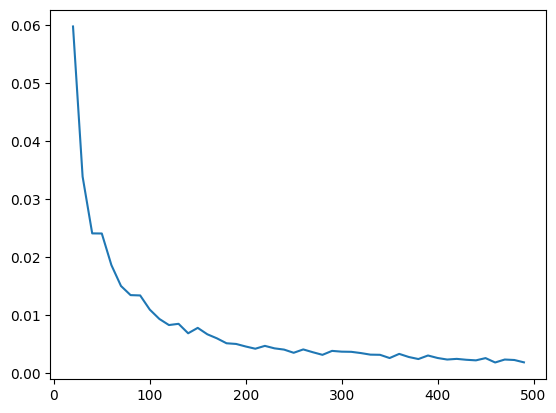

In [92]:
plt.plot(samples_size_to_excess_risk.keys(), samples_size_to_excess_risk.values())

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)